# DiploDatos 2019 -  Población Penitenciaria en Argentina


> http://diplodatos.famaf.unc.edu.ar/poblacion-penitenciaria-en-argentina-2002-a-2017/



# Análisis por género y clase

En esta notebook nos proponemos hacer un análisis más fino de las diferencias de género y clase en la población penitenciaria argentina. 

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Importamos las librerías necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 100)

#
sys.path.append('../config')
#from mpl_settings_v3 import *

In [3]:
## Cargamos el CSV en un dataframe. Si es posible, lo descargamos y 
## sino, lo leemos online. (Para descargarlo es necesario tener instalado wget)

data_dir = '../datasets'
data_file = os.path.join(data_dir, 'sneep_2017_diplodatos.zip')

if not os.path.isfile(data_file):
    print('No se encontró copia local del dataset. Leyendo online')
    data_raw = pd.read_csv(url,compression='zip',index_col=0)
else:
    data_raw = pd.read_csv(data_file, compression='zip', index_col=0)

/home/lucia/.anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
## Seteamos semilla random para reproducibilidad
np.random.seed(0)

Primero desplegamos los datos para explorarlos un poco

In [5]:
data_raw.head()
#data_raw.tail()

,anio_censo,provincia_descripcion,establecimiento_descripcion,edad,genero_descripcion,nacionalidad_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,ultimo_lugar_residencia_descripcion,ultima_provincia_residencia_descripcion,jurisdiccion_descripcion,situacion_legal_descripcion,fecha_detencion,fecha_condenado,establecimiento_procedencia_descripcion,delito1_descripcion,delito2_descripcion,delito3_descripcion,delito4_descripcion,delito5_descripcion,horas_trabajo_remunerado_descripcion,participacion_programa_laboral,participacion_programa_educativo_descripcion,participacion_actividades_deportivas,recibio_atencion_medica_ult_anio_descripcion,recibio_visitas_ultimo_anio,participo_alteracion_orden_ult_anio_descripcion,tipo_infraccion_disciplinaria_descripcion,sancion_aplicada_descripcion,calificacion_conducta_descripcion,tentativa_fugas_evasiones_descripcion,tentativa_suicidio,fue_lesionado_descripcion,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,tipo_condena,tiene_medidas_seguridad,es_reincidente_descripcion,tiene_periodo_progresividad_descripcion,reparticion_descripcion,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro
0,2017,Buenos Aires,UNIDAD 13 - JUNIN,28.0,Masculino,Argentina,Soltero,Primario incompleto,Desocupado,No tiene ni oficio ni profesión,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Condenado,2017-02-23,2017-08-11,Deriv. de una instit. Policial,Otros delitos contra las personas,Amenazas,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,Si - educación formal - SECUNDARIA (Polimodal),1.0,No,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,NaN,No,0.0,No fue lesionado,2.0,2.0,1,0.0,1.0,Primario,Período de observación,Provincial,No le fueron otorgadas,NaN,0.0,NaN,NaN,NaN,NaN
1,2017,Buenos Aires,UNIDAD 13 - JUNIN,31.0,Masculino,Argentina,Soltero,Primario completo,Trabajador de tiempo parcial,Tiene alguna profesión,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado,2016-07-14,NaN,Deriv. de una instit. Policial,Robo y/o tentativa de robo,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,0.0,Si - educación formal - SECUNDARIA (Polimodal),1.0,SI - OTRAS ENFERMEDADES,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,NaN,No,0.0,No fue lesionado,0.0,0.0,0,NaN,0.0,NaN,NaN,Provincial,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2017,Buenos Aires,UNIDAD 13 - JUNIN,22.0,Masculino,Argentina,Soltero,Primario completo,Desocupado,No tiene ni oficio ni profesión,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado,2015-06-11,NaN,Deriv. de una instit. Policial,Robo y/o tentativa de robo,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,1.0,No participa de ningún programa educativo,1.0,SI - OTRAS ENFERMEDADES,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,NaN,No,0.0,No fue lesionado,0.0,0.0,0,NaN,0.0,NaN,NaN,Provincial,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2017,Buenos Aires,UNIDAD 13 - JUNIN,31.0,Masculino,Argentina,Soltero,Terciario incompleto,Trabajador de tiempo parcial,Tiene alguna profesión,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado,2017-08-15,NaN,Deriv. de una instit. Policial,Otros delitos contra las personas,NaN,NaN,NaN,NaN,No tiene trabajo remunerado,1.0,No participa de ningún programa educativo,1.0,SI - OTRAS ENFERMEDADES,1.0,No participó de ninguna alteración,No cometió Infracción disciplinaria,NaN,NaN,No,0.0,No fue lesionado,0.0,0.0,0,NaN,0.0,NaN,NaN,Provincial,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2017,Buenos Aires,UNIDAD 13 - JUNIN,40.0,Masculino,Argentina,Soltero,Primario incompleto,Trabajador de tiempo parcial,Tiene alguna profesión,Urbano,Buenos Aires,PROVINCIAL - Buenos Aires,Procesado,2016-09-25,NaN,Deriv. de una instit. Polic

Vemos cuales son las variables de las cuales disponemos y sus tipos

In [6]:
data_raw.dtypes

anio_censo                                              int64
provincia_descripcion                                  object
establecimiento_descripcion                            object
edad                                                  float64
genero_descripcion                                     object
nacionalidad_descripcion                               object
estado_civil_descripcion                               object
nivel_instruccion_descripcion                          object
ultima_situacion_laboral_descripcion                   object
capacitacion_laboral_al_ingresar_descripcion           object
ultimo_lugar_residencia_descripcion                    object
ultima_provincia_residencia_descripcion                object
jurisdiccion_descripcion                               object
situacion_legal_descripcion                            object
fecha_detencion                                        object
fecha_condenado                                        object
establec

In [7]:
# Distribución por genero
g = data_raw["genero_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Masculino,81553,95.626326
Femenino,3602,4.223585
Transexual,128,0.150089


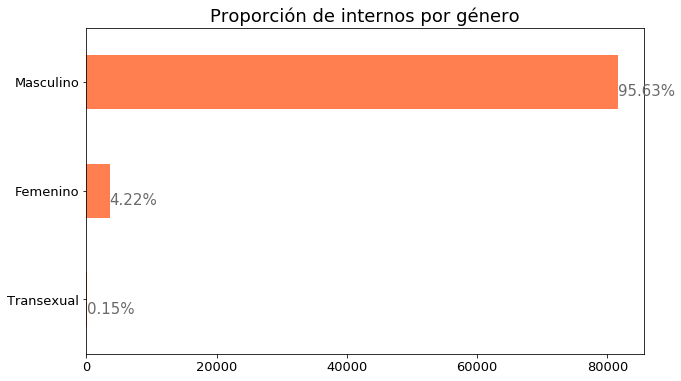

In [8]:
ax = data_raw["genero_descripcion"].value_counts().plot(kind='barh', figsize=(10,6), color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Proporción de internos por género", fontsize=18)
ax.set_xlabel("", fontsize=18);
ax.set_xticks([0, 20000, 40000, 60000, 80000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

Como puede observarse, más del 95% de las personas privadas de su libertad son identificadas con el género masculino, poco más del 4% se identifica como mujer, mientras que solo el 0.15% como transexual. Si bien la diferencia es abismal, quisieramos analizar la situación particular de estas minorías, por ejemplo, si es más común que sean condenados por ciertos delitos que por otros, si se le dan penas distintas que a la población general por los mismos delitos, si reciben más o menos beneficios, más o menos educación, formación o trabajo que la población general, etc.

Para comenzar quisieramos saber cuáles son los tipos de delitos por los cuales las personas están privadas de su libertad. Tenemos en cuenta que estos datos corresponden solo al año 2017, fijamos el año para no contar dos veces al mismo reo, además solo utilizamos el delito principal de cada persona.

In [9]:
g = data_raw["delito1_descripcion"]
df = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Robo y/o tentativa de robo,29217,34.683460
Infracción ley n° 23.737 (estupefacientes),11489,13.638576
Homicidios dolosos,10843,12.871710
Violaciones,8675,10.298080
Otros delitos contra las personas,4530,5.377557
Otros delitos contra la propiedad,3646,4.328162
Hurto y/o tentativa de hurto,2216,2.630611
Homicidios dolosos (tent.),1765,2.095229
Otros delitos contra la integridad sexual,1741,2.066739
Lesiones Dolosas,1350,1.602583


Text(0.5, 1.0, 'Frecuencia delitos, población general')

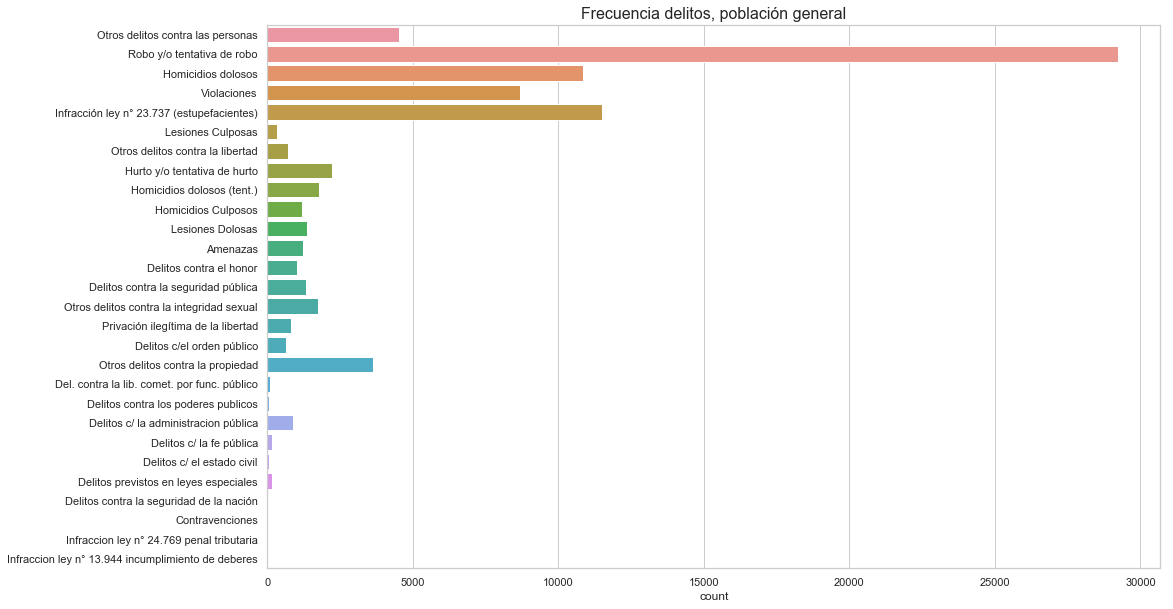

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw)
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población general", fontsize=16)

Quisieramos ver cuáles tipos de delitos son más comunes según el género y en las minorías de género.

In [11]:
m = data_raw.loc[data_raw["genero_descripcion"] == 'Masculino']["delito1_descripcion"]
df = pd.concat([m.value_counts(), 
                m.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Robo y/o tentativa de robo,28626,35.543911
Homicidios dolosos,10368,12.873586
Infracción ley n° 23.737 (estupefacientes),9862,12.245303
Violaciones,8570,10.641072
Otros delitos contra las personas,4355,5.407452
Otros delitos contra la propiedad,3484,4.325962
Hurto y/o tentativa de hurto,2153,2.673305
Homicidios dolosos (tent.),1694,2.103381
Otros delitos contra la integridad sexual,1650,2.048748
Lesiones Dolosas,1321,1.640240


Text(0.5, 1.0, 'Frecuencia delitos, población masculina')

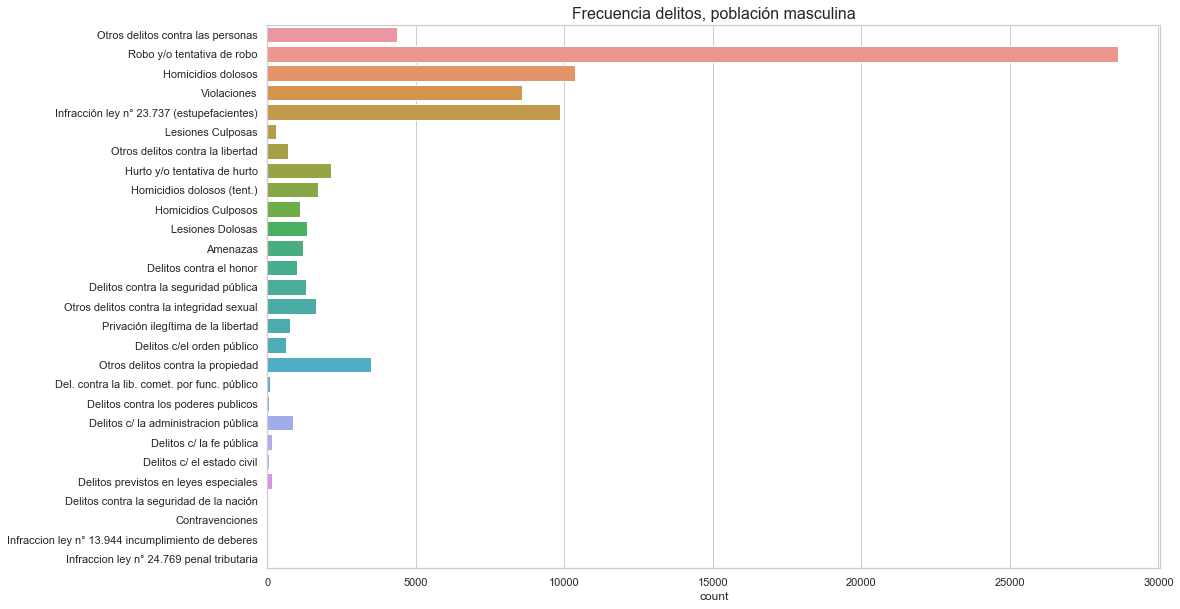

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw.loc[data_raw["genero_descripcion"] == 'Masculino'])
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población masculina", fontsize=16)

In [13]:
f = data_raw.loc[data_raw["genero_descripcion"] == 'Femenino']["delito1_descripcion"]
df = pd.concat([f.value_counts(), 
                f.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Infracción ley n° 23.737 (estupefacientes),1539,43.048951
Robo y/o tentativa de robo,584,16.335664
Homicidios dolosos,463,12.951049
Otros delitos contra las personas,172,4.811189
Otros delitos contra la propiedad,161,4.503497
Violaciones,98,2.741259
Otros delitos contra la integridad sexual,88,2.461538
Homicidios Culposos,85,2.377622
Homicidios dolosos (tent.),69,1.930070
Hurto y/o tentativa de hurto,63,1.762238


Text(0.5, 1.0, 'Frecuencia delitos, población femenina')

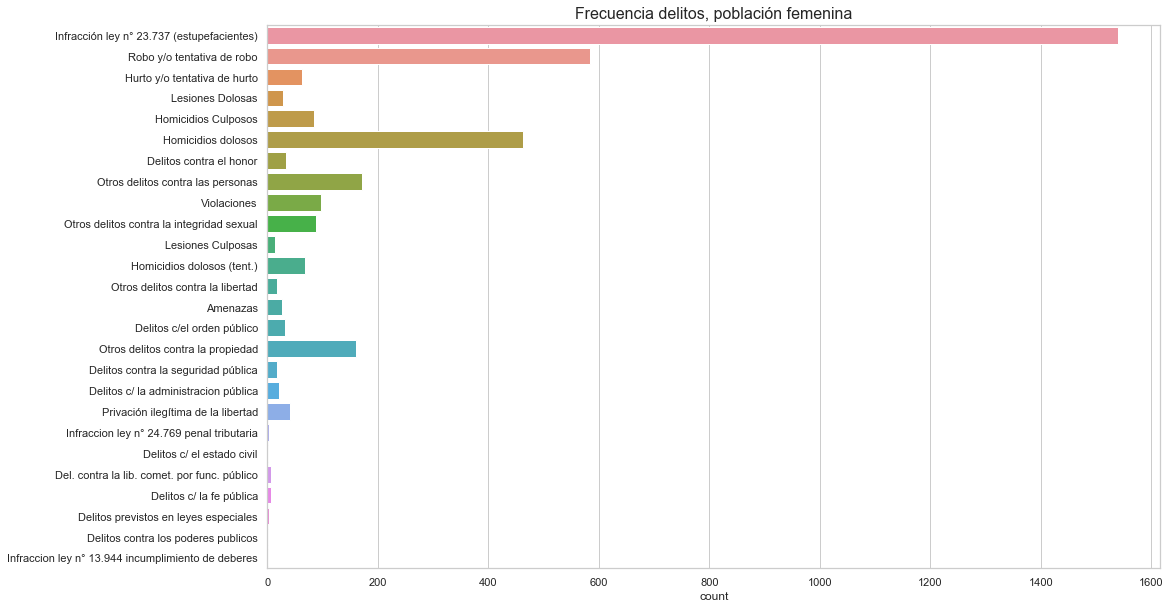

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw.loc[data_raw["genero_descripcion"] == 'Femenino'])
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población femenina", fontsize=16)

In [15]:
t = data_raw.loc[data_raw["genero_descripcion"] == 'Transexual']["delito1_descripcion"]
df = pd.concat([t.value_counts(), 
                t.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
df

,counts,percentage
Infracción ley n° 23.737 (estupefacientes),88,69.291339
Homicidios dolosos,12,9.448819
Violaciones,7,5.511811
Robo y/o tentativa de robo,7,5.511811
Otros delitos contra la integridad sexual,3,2.362205
Otros delitos contra las personas,3,2.362205
Homicidios dolosos (tent.),2,1.574803
Privación ilegítima de la libertad,2,1.574803
Delitos previstos en leyes especiales,1,0.787402
Amenazas,1,0.787402


Text(0.5, 1.0, 'Frecuencia delitos, población trans')

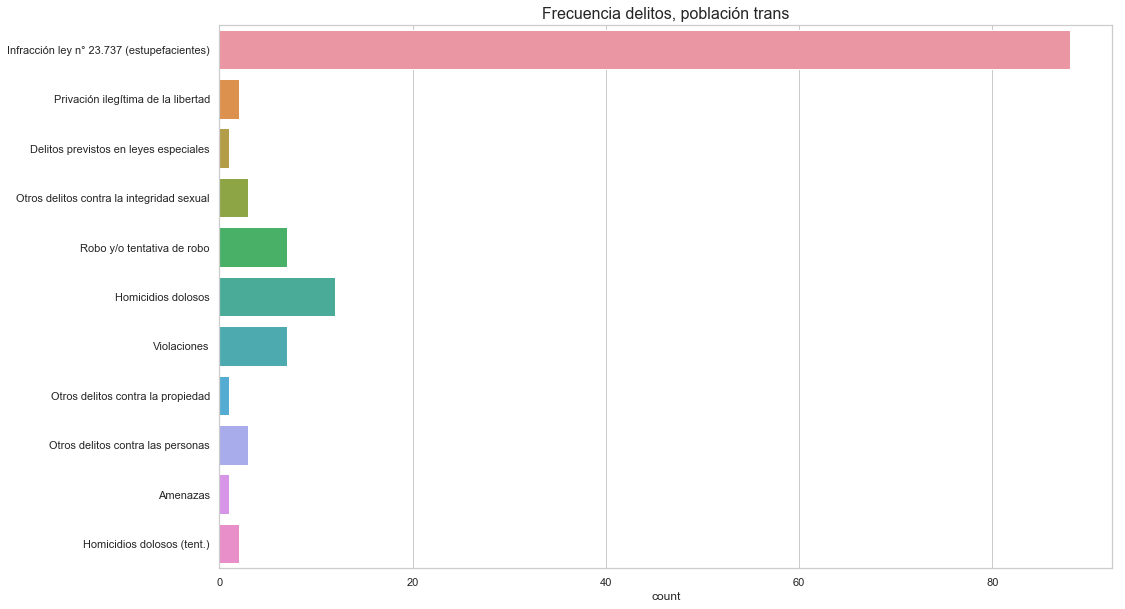

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="delito1_descripcion", data=data_raw.loc[data_raw["genero_descripcion"] == 'Transexual'])
ax.set_ylabel('') 
ax.set_title("Frecuencia delitos, población trans", fontsize=16)

El delito principal entre la población masculina presa es Robo y/o tentativa de robo (más del 35% de los casos). Entre mujeres y trans el principal delito es la Infracción a la ley de estupefacientes; casi el 43% de las mujeres privadas de su libertad es por esta causa, mientras que en el caso de las personas trans este porcentaje asciende a más del 69%. Si se observa la población general, el principal delito es Robo y/o tentativa de robo, esto se debe a que como la población masculina es mucho mayor, sus tendencias absorben a las de las minorías, por eso queríamos hacer este análisis diferenciado. En el caso de la población masculina, el delito de Infracción a la ley de estupefacientes es el tercero más frecuente, siendo el segundo los Homicidios dolosos. 

A continuación queremos comparar las proporciones de los principales delitos (y de los delitos que son de nuestro interés) por género. Puesto que, como habiamos dicho, la población masculina es mucho mayor, pasamos las cantidades a porcentajes para hacerlas comparables.

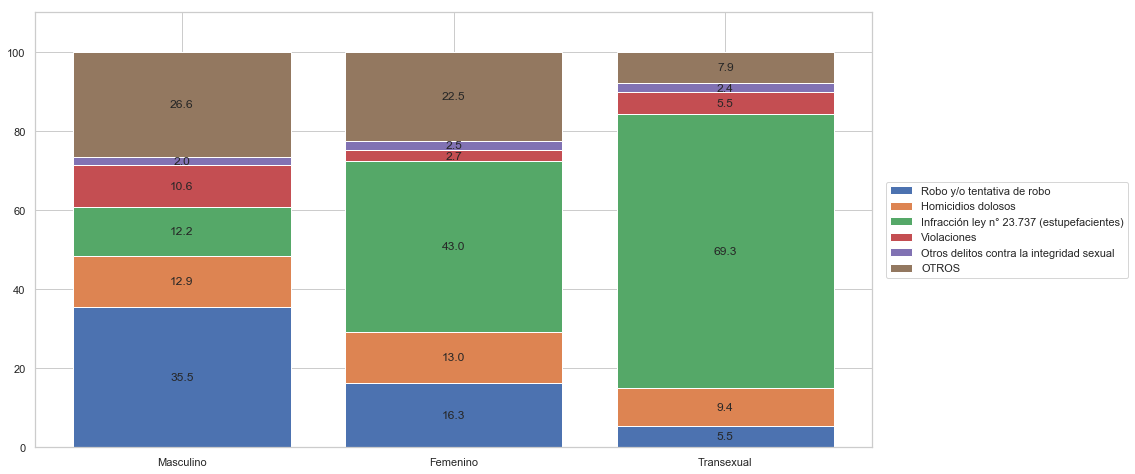

In [17]:
x = ['Masculino', 'Femenino', 'Transexual']

mas = m.value_counts()
fem = f.value_counts()
trans = t.value_counts()

# normalization
y1 = mas/sum(mas)*100.
y2 = fem/sum(fem)*100.
y3 = trans/sum(trans)*100.

z1 = np.array([y1[0], y2[1], y3[2]]) #'Robo y/o tentativa de robo'
z2 = np.array([y1[1], y2[2], y3[1]]) #'Homicidios dolosos'
z3 = np.array([y1[2], y2[0], y3[0]]) #'Infracción ley n° 23.737 (estupefacientes)'
z4 = np.array([y1[3], y2[5], y3[3]]) #'Violaciones'
z5 = np.array([y1[8], y2[6], y3[5]]) #'Otros delitos contra la integridad sexual'
z6 = np.array([sum(y1)-y1[0]-y1[1]-y1[2]-y1[3]-y1[8], 
              sum(y2)-y2[0]-y2[1]-y2[2]-y2[5]-y2[6], 
              sum(y3)-y3[0]-y3[1]-y3[2]-y3[3]-y3[5]]) #'OTROS'

plt.figure(figsize=(15,8))

# stack bars
plt.bar(x, z1, label='Robo y/o tentativa de robo')
plt.bar(x, z2, bottom= z1, label='Homicidios dolosos')
plt.bar(x, z3, bottom= z1 + z2, label='Infracción ley n° 23.737 (estupefacientes)')
plt.bar(x, z4, bottom= z1 + z2 + z3, label='Violaciones')
plt.bar(x, z5, bottom= z1 + z2 + z3 + z4, label='Otros delitos contra la integridad sexual')
plt.bar(x, z6, bottom= z1 + z2 + z3 + z4 + z5, label='OTROS')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, z1/2, z1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2/2, z2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3/2, z3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3+z4/2, z4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3+z4+z5/2, z5):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, z1+z2+z3+z4+z5+z6/2, z6):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
    
plt.ylim(0,110)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
#plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

Es notoria la desproporción de los delitos por género, podemos afirmar, sin riesgo de equivocarnos, que la aplicación de la ley estupefacientes afecta en mayor proporción a mujeres y personas trans que a varones cis.

Esto es así por lo menos para el año 2017, podríamos hacer un análisis temporal para ver cómo fueron variando estas proporciones a través de los años, desde el 2012 al 2017.

En el trabajo anterior vimos que los delitos de tenencia y tráfico de drogas están vinculados a la inmigración por lo que podríamos investigar más cuál es la relación entre estas dos variables, género y migración.